In [1]:
# Import the script
import sys
import pandas as pd
sys.path.append("../scripts")
import portfolio_optimization as po

In [2]:
sys.path.append("../scripts")
import future_forecast

In [3]:
# Load model and data
model, data = future_forecast.load_model_and_data(
    model_path='../model/optimized_lstm.keras',
    data_path='../data/TSLA_cleaned.csv'
)

2025-03-03 20:05:12,590 - INFO - Loading model and data...
c:\Users\HP\Documents\Dagii\week-11\TimeSeries-Portfolio-Optimization\week-11\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-03-03 20:05:12,785 - INFO - Model and data loaded successfully. Data shape: (2505, 9)


In [4]:
# Preprocess data
look_back = model.input_shape[1]  # Get sequence length from model
scaler, input_sequence = future_forecast.preprocess_data(data, look_back)

2025-03-03 19:22:49,806 - INFO - Preprocessing data...
2025-03-03 19:22:49,812 - INFO - Data preprocessing complete.


In [5]:
# Get the last known price
last_price = data['Close'].iloc[-1]

In [6]:
# Generate forecasts
forecasts, median_forecast, lower_bound, upper_bound = future_forecast.forecast_with_ci(
    model, input_sequence, scaler, last_price, steps=252
)

2025-03-03 19:23:16,637 - INFO - Generating forecasts with confidence intervals...
2025-03-03 19:57:38,964 - INFO - Forecast generation complete.


In [11]:
# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(last_date + pd.offsets.BDay(1), periods=252, freq='B')

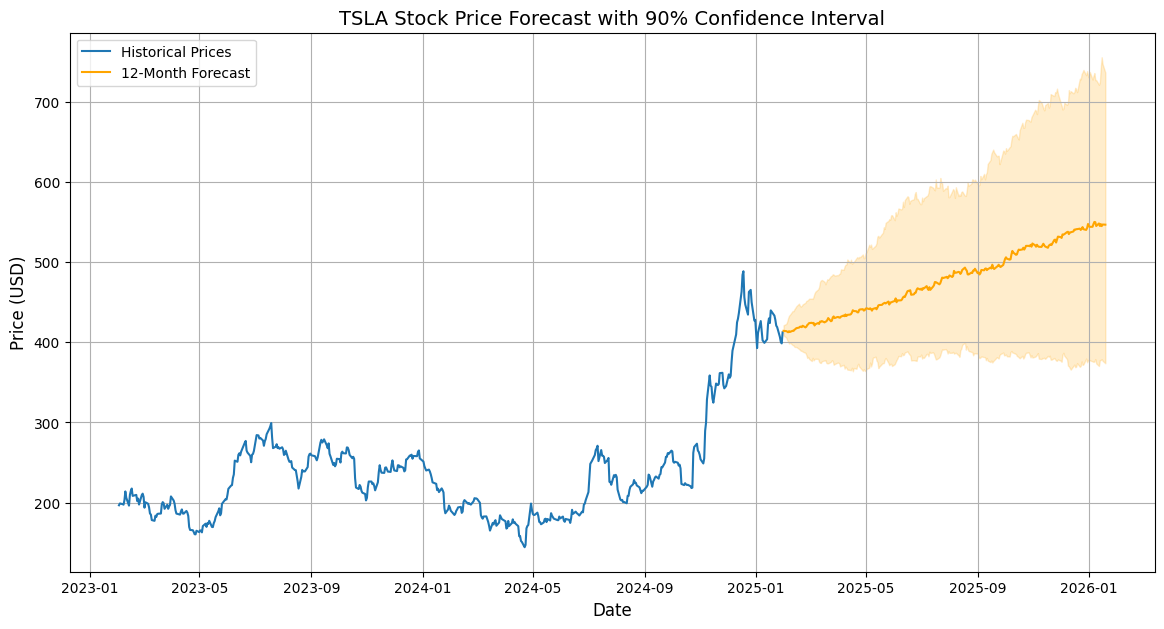

In [12]:
# Plot results
future_forecast.plot_forecast(data, median_forecast, lower_bound, upper_bound, future_dates)


In [13]:
# Generate and print analysis
analysis = future_forecast.generate_analysis(data, median_forecast, lower_bound, upper_bound, future_dates)
print(analysis)


** Trend Analysis **
1. Direction: Bullish 
   - Projected Change: 32.5%
   - Pattern: Volatile Movement

** Volatility & Risk **
1. Average CI Width: $210.06
2. Maximum Uncertainty: Jan 2026
   - Range: $363.80 - $755.45

** Market Opportunities **
1. Potential Entry: $380.22 (±$16.42)
2. Price Targets:
   - Conservative: $477.86
   - Optimistic: $590.28

** Key Risks **
1. Downside Protection: $363.80 
2. High Volatility Periods: 
   - Jan 2025 (Initial Forecast Uncertainty)
   - Jul 2025 (Mid-Year Projections)



In [17]:
sys.path.append("..") 

In [18]:
from src.data_loader import load_data 

In [19]:
bnd = load_data("BND")
spy = load_data("SPY")
tesla = load_data("TSLA")


2025-03-03 20:25:48,330 - INFO - Loading data for BND...
2025-03-03 20:25:48,346 - INFO - Successfully loaded data for BND from c:\Users\HP\Documents\Dagii\week-11\TimeSeries-Portfolio-Optimization\data\BND_data.csv.
2025-03-03 20:25:48,347 - INFO - Loading data for SPY...
2025-03-03 20:25:48,358 - INFO - Successfully loaded data for SPY from c:\Users\HP\Documents\Dagii\week-11\TimeSeries-Portfolio-Optimization\data\SPY_data.csv.
2025-03-03 20:25:48,358 - INFO - Loading data for TSLA...
2025-03-03 20:25:48,377 - INFO - Successfully loaded data for TSLA from c:\Users\HP\Documents\Dagii\week-11\TimeSeries-Portfolio-Optimization\data\TSLA_data.csv.


Number of columns in BND_data.csv: 6
Number of columns in SPY_data.csv: 6
Number of columns in TSLA_data.csv: 6


In [20]:
spy.head()

,Date,Price,Close,High,Low,Volume
0,2015-01-05,169.475952,171.702356,169.165099,171.534328,169632600
1,2015-01-06,167.879608,170.316050,167.073055,169.786749,209151400
2,2015-01-07,169.971649,170.316116,168.770234,169.223912,125346700
3,2015-01-08,172.987717,173.206165,171.383032,171.399826,147217800
4,2015-01-09,171.601501,173.424635,170.979783,173.407828,158567300


hear

In [3]:
# Load historical data
data = po.historical_data()


2025-03-03 20:13:34,158 - INFO - Loading TSLA data from CSV...
2025-03-03 20:13:34,183 - INFO - TSLA data loaded successfully. Shape: (2505, 9)
2025-03-03 20:13:34,184 - INFO - Loading BND data from CSV...
2025-03-03 20:13:34,188 - ERROR - Error loading historical data: 'Date' is not in list


ValueError: 'Date' is not in list

In [16]:
# Forecast prices (use TSLA forecast from Task 3)
tsla_forecast = median_forecast  # Pass the median_forecast here
forecast_df = po.forecast_prices(data, tsla_forecast)

2025-03-03 19:59:52,449 - INFO - Forecasting prices for BND and SPY...
2025-03-03 19:59:52,456 - INFO - Price forecasting complete.


In [17]:
# Optimize portfolio
optimal_weights, portfolio_return, portfolio_volatility, sharpe_ratio, var_95 = po.optimize_portfolio(forecast_df)


2025-03-03 19:59:55,885 - INFO - Optimizing portfolio weights...
2025-03-03 19:59:55,899 - INFO - Portfolio optimization complete.


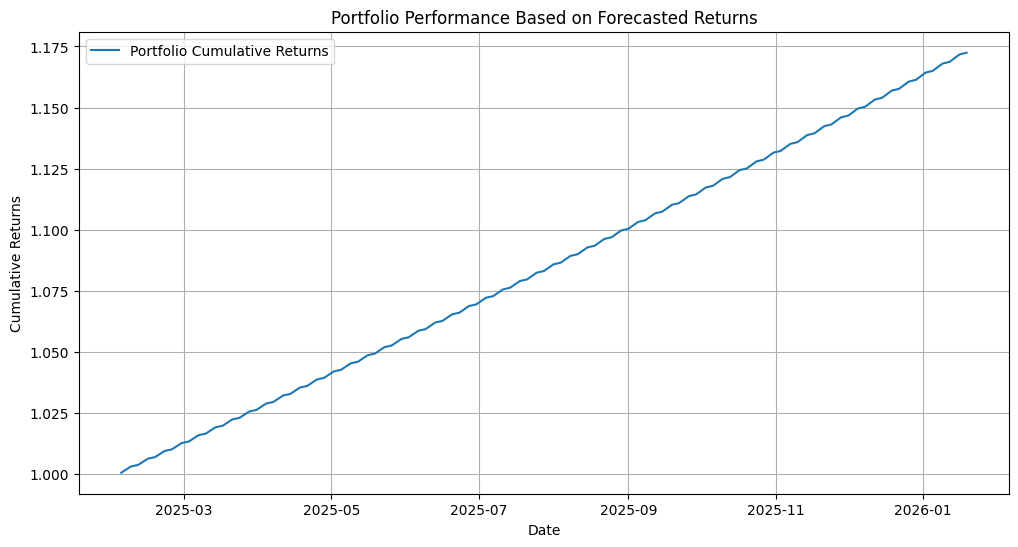

In [18]:
# Plot portfolio performance
po.plot_portfolio_performance(forecast_df, optimal_weights)

In [19]:
# Print results
print(f"""
** Optimized Portfolio Allocation **
- TSLA: {optimal_weights[0]:.2%}
- BND: {optimal_weights[1]:.2%}
- SPY: {optimal_weights[2]:.2%}

** Portfolio Metrics **
- Expected Annual Return: {portfolio_return:.2%}
- Annual Volatility: {portfolio_volatility:.2%}
- Sharpe Ratio: {sharpe_ratio:.2f}
- Value at Risk (95%): {var_95:.2%}
""")


** Optimized Portfolio Allocation **
- TSLA: 0.00%
- BND: 0.00%
- SPY: 100.00%

** Portfolio Metrics **
- Expected Annual Return: 15.98%
- Annual Volatility: 0.00%
- Sharpe Ratio: 64871808405987.02
- Value at Risk (95%): 0.06%

